<a href="https://colab.research.google.com/github/KudeshiaAnkit/SRproject/blob/master/Intraday_BANKNIFTY_All_indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1TqAMxBVYVmyuX78-OhCJy8L1epZjicUF

Downloading...
From: https://drive.google.com/uc?id=1TqAMxBVYVmyuX78-OhCJy8L1epZjicUF
To: /content/itrade.db
100% 245M/245M [00:01<00:00, 207MB/s]


In [ ]:
!pip install -q ta swifter

In [ ]:
import sqlite3
import swifter
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

from ta import add_all_ta_features
from ta.volatility import BollingerBands
from ta.trend import EMAIndicator, MACD
from ta.momentum import RSIIndicator
pd.options.mode.chained_assignment = None

In [ ]:
connection = sqlite3.connect("itrade.db", check_same_thread=False)

In [ ]:
df = pd.read_sql("SELECT * FROM intraday_table", con=connection)

In [ ]:
df

,id,ticker,date,time,open,high,low,close,day,month,year,hour,minute
0,0,BANKNIFTY,2012-12-03 00:00:00,09:16:00.000000,12125.70,12161.70,12125.70,12160.95,3.0,12.0,2012.0,9.0,16.0
1,1,BANKNIFTY,2012-12-03 00:00:00,09:17:00.000000,12161.75,12164.80,12130.40,12130.40,3.0,12.0,2012.0,9.0,17.0
2,2,BANKNIFTY,2012-12-03 00:00:00,09:18:00.000000,12126.85,12156.10,12126.85,12156.10,3.0,12.0,2012.0,9.0,18.0
3,3,BANKNIFTY,2012-12-03 00:00:00,09:19:00.000000,12157.25,12164.75,12151.60,12164.20,3.0,12.0,2012.0,9.0,19.0
4,4,BANKNIFTY,2012-12-03 00:00:00,09:20:00.000000,12162.80,12162.80,12148.20,12151.15,3.0,12.0,2012.0,9.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418647,345504,NIFTY,2011-12-30 00:00:00,15:26:00.000000,4619.35,4620.75,4619.25,4620.40,30.0,12.0,2011.0,15.0,26.0
2418648,345505,NIFTY,2011-12-30 00:00:00,15:27:00.000000,4620.60,4621.55,4620.20,4620.80,30.0,12.0,2011.0,15.0,27.0
2418649,345506,NIFTY,2011-12-30 00:00:00,15:28:00.000000,4620.60,4621.15,4619.70,4619.95,30.0,12.0,2011.0,15.0,28.0
2418650,345507,NIFTY,2011-12-30 00:00:00,15:29:00.000000,4619.30,4619.70,4617.05,4617.35,30.0,12.0,2011.0,15.0,29.0


In [ ]:
df["ticker"].value_counts()

NIFTY        1295165
BANKNIFTY    1123487
Name: ticker, dtype: int64

In [ ]:
#df["volume"] = 0.0

In [ ]:
df = df[df["ticker"] == "BANKNIFTY"].reset_index(drop=True)

In [ ]:
#df = add_all_ta_features(df, open="open", high="high", low="low", close="close", volume="volume", fillna=True)

In [ ]:
df

,id,ticker,date,time,open,high,low,close,day,month,year,hour,minute
0,0,BANKNIFTY,2012-12-03 00:00:00,09:16:00.000000,12125.70,12161.70,12125.70,12160.95,3.0,12.0,2012.0,9.0,16.0
1,1,BANKNIFTY,2012-12-03 00:00:00,09:17:00.000000,12161.75,12164.80,12130.40,12130.40,3.0,12.0,2012.0,9.0,17.0
2,2,BANKNIFTY,2012-12-03 00:00:00,09:18:00.000000,12126.85,12156.10,12126.85,12156.10,3.0,12.0,2012.0,9.0,18.0
3,3,BANKNIFTY,2012-12-03 00:00:00,09:19:00.000000,12157.25,12164.75,12151.60,12164.20,3.0,12.0,2012.0,9.0,19.0
4,4,BANKNIFTY,2012-12-03 00:00:00,09:20:00.000000,12162.80,12162.80,12148.20,12151.15,3.0,12.0,2012.0,9.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123482,174161,BANKNIFTY,2011-12-30 00:00:00,15:26:00.000000,7955.80,7956.25,7954.30,7956.25,30.0,12.0,2011.0,15.0,26.0
1123483,174162,BANKNIFTY,2011-12-30 00:00:00,15:27:00.000000,7955.80,7959.90,7955.80,7959.80,30.0,12.0,2011.0,15.0,27.0
1123484,174163,BANKNIFTY,2011-12-30 00:00:00,15:28:00.000000,7960.90,7963.45,7960.90,7961.40,30.0,12.0,2011.0,15.0,28.0
1123485,174164,BANKNIFTY,2011-12-30 00:00:00,15:29:00.000000,7959.45,7959.45,7953.30,7954.70,30.0,12.0,2011.0,15.0,29.0


In [ ]:
df.to_csv("BANKNIFTY_indicators_intraday.csv")

In [ ]:
df["date"] = pd.to_datetime(df["date"] + ' ' + df["time"])

In [ ]:
df = df.drop(columns=["day", "month", "year", "hour", "minute", "time", "id"])

In [ ]:
indicator_columns = list(df.columns[7:-1])

In [ ]:
df = df[["date", "open", "high", "low", "close", *indicator_columns]]

In [ ]:
df = df.sort_values(by="date")

In [ ]:
df

,date,open,high,low,close
949321,2010-03-02 09:01:00,8826.90,8856.95,8826.90,8839.80
949322,2010-03-02 09:02:00,8840.75,8853.90,8832.80,8852.30
949323,2010-03-02 09:03:00,8855.70,8855.70,8844.65,8846.65
949324,2010-03-02 09:04:00,8843.85,8850.70,8843.75,8846.70
949325,2010-03-02 09:05:00,8846.40,8846.40,8837.75,8841.60
...,...,...,...,...,...
949316,2022-03-31 15:27:00,36376.10,36379.25,36368.80,36371.55
949317,2022-03-31 15:28:00,36372.35,36386.15,36368.60,36370.30
949318,2022-03-31 15:29:00,36374.55,36374.55,36337.85,36355.50
949319,2022-03-31 15:30:00,36352.60,36375.00,36343.90,36371.00


In [ ]:
titles = [
    "open", "high", "low", "close", *indicator_columns
]

feature_keys = [
    "open", "high", "low", "close", *indicator_columns
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
]*19

date_time_key = "date"

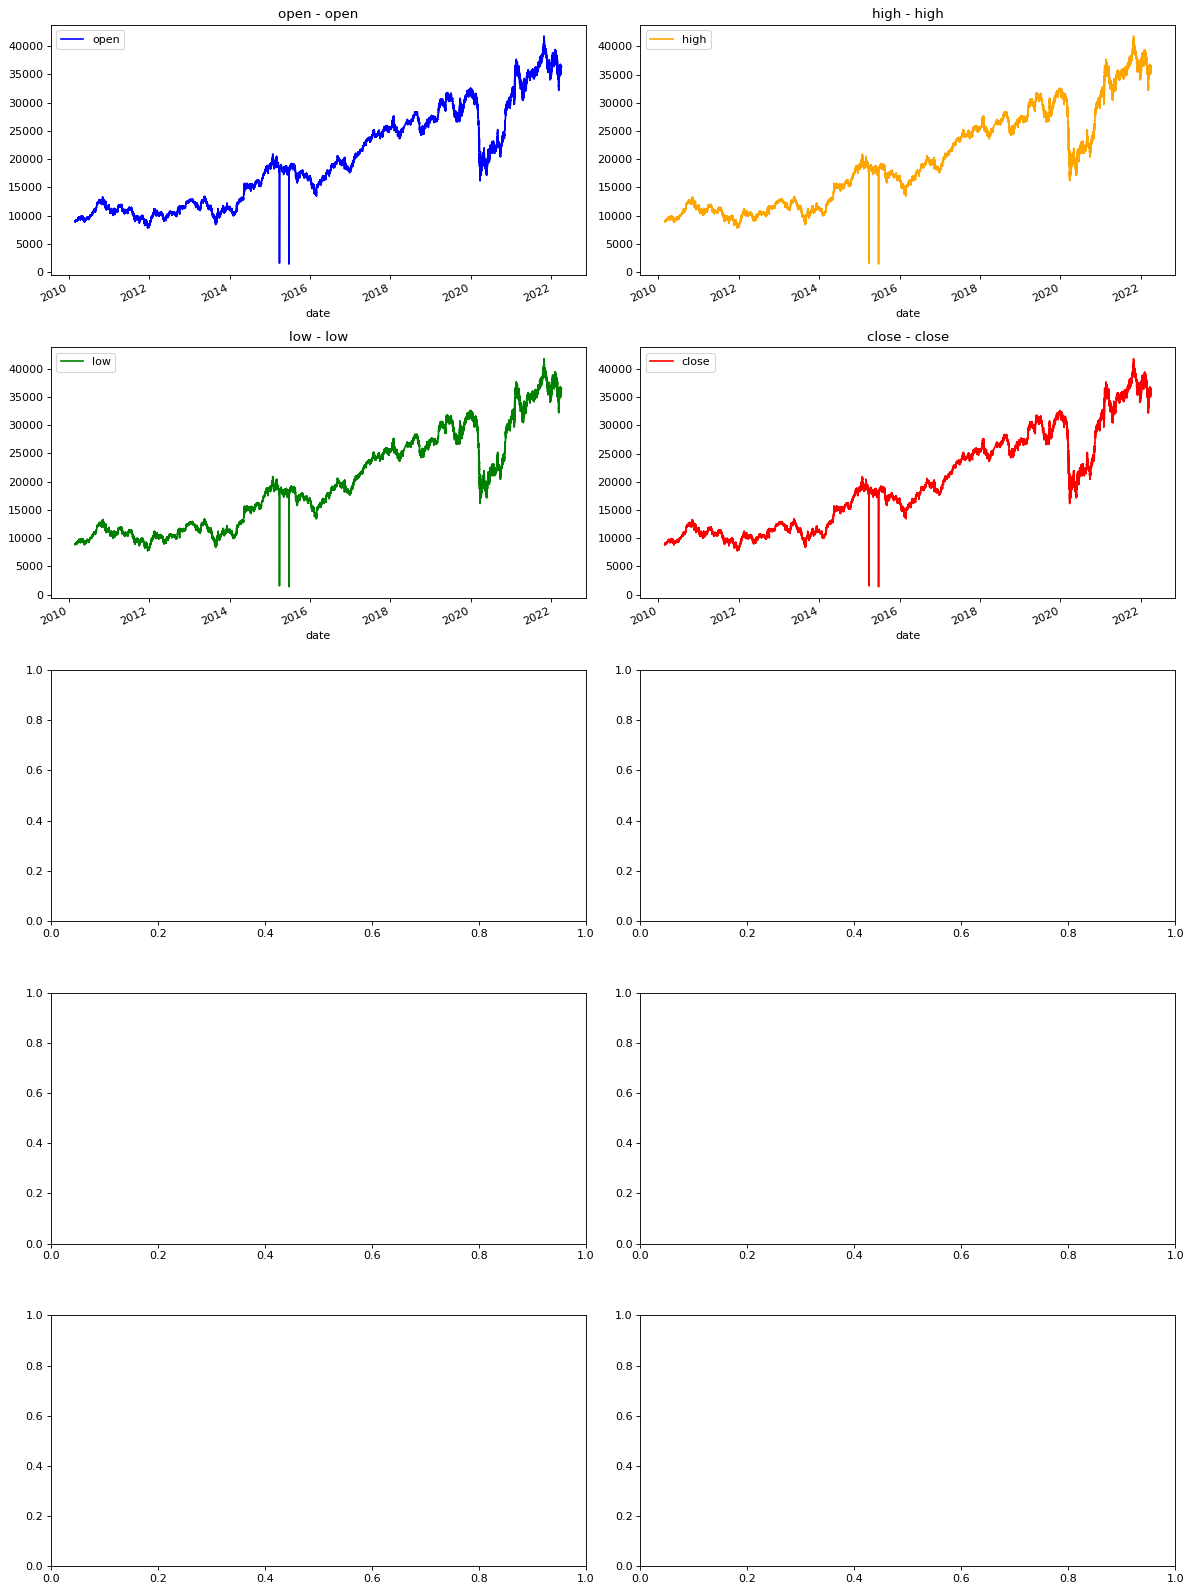

In [ ]:
def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=5, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys[:10])):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)

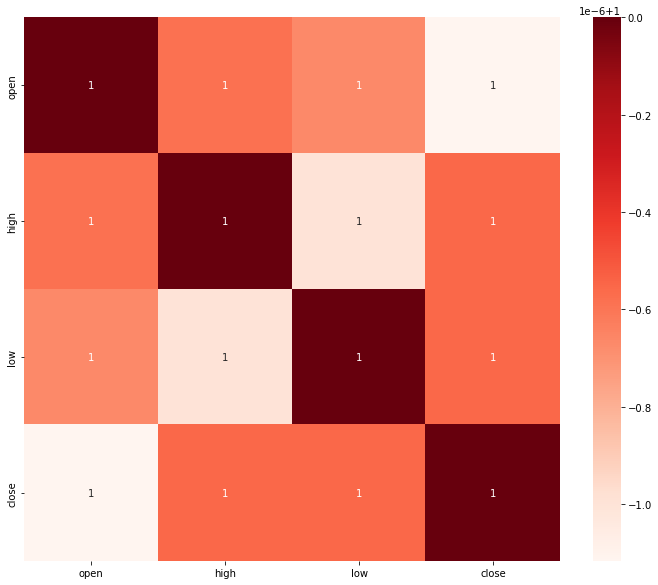

In [ ]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["close"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.85]

In [ ]:
relevant_features

open     0.999999
high     0.999999
low      0.999999
close    1.000000
Name: close, dtype: float64

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
split_fraction = 0.99
train_split = int(split_fraction * int(df.shape[0]))
step = 1

past = 720
future = 120
learning_rate = 0.00001
batch_size = 32
epochs = 5

In [ ]:
def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std, data_mean, data_std
    #return data[:train_split]

In [ ]:
selected_features = list(relevant_features.keys())[:]
print(
    "The selected parameters are:",
    ", ".join(selected_features),
) #[feature_keys[i] for i in [3]]
features = df[selected_features]
features.index = df[date_time_key]
features.head()

features, scaler_mean, scaler_std = normalize(features.values, train_split)
#features = normalize(features.values, train_split)
features = pd.DataFrame(features)
train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

The selected parameters are: open, high, low, close


In [ ]:
df[train_split:]

,date,open,high,low,close
1112252,2022-02-16 09:42:00,38201.90,38204.35,38174.65,38192.15
1112253,2022-02-16 09:43:00,38190.00,38197.65,38163.90,38169.65
1112254,2022-02-16 09:44:00,38165.80,38183.05,38144.00,38145.30
1112255,2022-02-16 09:45:00,38146.45,38151.60,38131.80,38136.70
1112256,2022-02-16 09:46:00,38137.80,38201.85,38122.00,38181.65
...,...,...,...,...,...
1123482,2022-03-31 15:27:00,36376.10,36379.25,36368.80,36371.55
1123483,2022-03-31 15:28:00,36372.35,36386.15,36368.60,36370.30
1123484,2022-03-31 15:29:00,36374.55,36374.55,36337.85,36355.50
1123485,2022-03-31 15:30:00,36352.60,36375.00,36343.90,36371.00


In [ ]:
selected_features

['open', 'high', 'low', 'close']

In [ ]:
len(selected_features)

4

In [ ]:
df.loc[0 : train_split - 1].to_csv("training_BANKNIFTY.csv", encoding="utf-8")

In [ ]:
df.loc[train_split:].to_csv("testing_BANKNIFTY.csv", encoding="utf-8")

In [ ]:
df[selected_features]

,open,high,low,close
0,8826.90,8856.95,8826.90,8839.80
1,8840.75,8853.90,8832.80,8852.30
2,8855.70,8855.70,8844.65,8846.65
3,8843.85,8850.70,8843.75,8846.70
4,8846.40,8846.40,8837.75,8841.60
...,...,...,...,...
1123482,36376.10,36379.25,36368.80,36371.55
1123483,36372.35,36386.15,36368.60,36370.30
1123484,36374.55,36374.55,36337.85,36355.50
1123485,36352.60,36375.00,36343.90,36371.00


In [ ]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(len(selected_features))]].values
y_train = features.iloc[start:end][[0, 1, 2, 3]].values

sequence_length = int(past / step)

In [ ]:
x_train, x_train.shape

(array([[-1.27001789, -1.26676325, -1.26970884, -1.26848529],
        [-1.26837473, -1.26712498, -1.26900862, -1.26700228],
        [-1.26660106, -1.2669115 , -1.26760224, -1.2676726 ],
        ...,
        [ 2.2100598 ,  2.21938527,  2.21088671,  2.21991276],
        [ 2.21997219,  2.21846613,  2.21430475,  2.21509596],
        [ 2.21332241,  2.21503267,  2.2138953 ,  2.21498918]]), (1112252, 4))

In [ ]:
y_train, y_train.shape

(array([[-1.24378655, -1.24399215, -1.24384212, -1.2441106 ],
        [-1.24429671, -1.24430644, -1.24413883, -1.24400976],
        [-1.24404163, -1.24389727, -1.24373531, -1.24357672],
        ...,
        [ 2.13845453,  2.13737374,  2.13703691,  2.13683477],
        [ 2.13695967,  2.13548207,  2.13640196,  2.13649071],
        [ 2.1363902 ,  2.13665621,  2.13789735,  2.13739831]]), (1112252, 4))

In [ ]:
dataset_train = tf.keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [ ]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(len(selected_features))]].values
y_val = features.iloc[label_start:][[0, 1, 2, 3]]

dataset_val = tf.keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (32, 720, 4)
Target shape: (32, 4)


In [ ]:
inputs = tf.keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
conv = tf.keras.layers.Conv1D(filters=8, kernel_size=7, activation="relu")(inputs)
conv = tf.keras.layers.Conv1D(filters=4, kernel_size=11, activation="relu")(conv)
lstm_out = tf.keras.layers.LSTM(16)(conv)
dense_out = tf.keras.layers.Dense(16, activation="relu")(lstm_out)
dropped_out = tf.keras.layers.Dropout(0.4)(dense_out)
outputs = tf.keras.layers.Dense(4)(dropped_out)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 720, 4)]          0         
                                                                 
 conv1d (Conv1D)             (None, 714, 8)            232       
                                                                 
 conv1d_1 (Conv1D)           (None, 704, 4)            356       
                                                                 
 lstm (LSTM)                 (None, 16)                1344      
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 68    

In [ ]:
random_preds = model.predict(dataset_val)

In [ ]:
test_df = pd.read_csv("/content/testing_BANKNIFTY.csv")

In [ ]:
test_df = test_df[719:-720].reset_index(drop=True)
test_df = test_df[120:].reset_index(drop=True)

In [ ]:
len(test_df)

9676

In [ ]:
random_preds.shape

(9676, 4)

In [ ]:
len(test_df) - random_preds.shape[0]

0

In [ ]:
path_checkpoint = "model_checkpoint.h5"
es_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=2)

modelckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/5
34735/34736 [============================>.] - ETA: 0s - loss: 0.2610
Epoch 1: val_loss improved from inf to 0.01943, saving model to model_checkpoint.h5
34736/34736 [==============================] - 802s 23ms/step - loss: 0.2610 - val_loss: 0.0194
Epoch 2/5
34734/34736 [============================>.] - ETA: 0s - loss: 0.1356
Epoch 2: val_loss improved from 0.01943 to 0.00847, saving model to model_checkpoint.h5
34736/34736 [==============================] - 798s 23ms/step - loss: 0.1356 - val_loss: 0.0085
Epoch 3/5
34735/34736 [============================>.] - ETA: 0s - loss: 0.1132
Epoch 3: val_loss improved from 0.00847 to 0.00656, saving model to model_checkpoint.h5
34736/34736 [==============================] - 798s 23ms/step - loss: 0.1132 - val_loss: 0.0066
Epoch 4/5
34735/34736 [============================>.] - ETA: 0s - loss: 0.1012
Epoch 4: val_loss improved from 0.00656 to 0.00628, saving model to model_checkpoint.h5
34736/34736 [==============================]

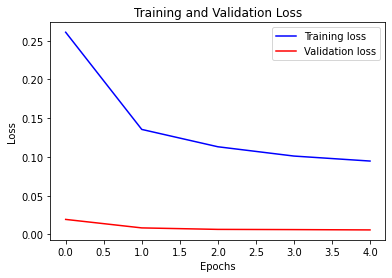

In [ ]:
def visualize_loss(history, title):
    
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

In [ ]:
preds = model.predict(dataset_val)

In [ ]:
preds.shape

(9676, 4)

In [ ]:
#scaler_std

In [ ]:
test_df

,Unnamed: 0,date,open,high,low,close
0,1113091,2022-02-18 11:05:00,37539.00,37553.70,37539.00,37547.40
1,1113092,2022-02-18 11:06:00,37542.40,37572.70,37542.40,37571.05
2,1113093,2022-02-18 11:07:00,37575.95,37582.45,37564.10,37565.55
3,1113094,2022-02-18 11:08:00,37569.75,37577.05,37565.80,37569.65
4,1113095,2022-02-18 11:09:00,37571.95,37581.70,37569.90,37573.45
...,...,...,...,...,...,...
9671,1122762,2022-03-30 09:45:00,36153.15,36181.90,36153.15,36175.50
9672,1122763,2022-03-30 09:46:00,36176.85,36180.55,36158.90,36170.25
9673,1122764,2022-03-30 09:47:00,36173.80,36185.10,36168.55,36172.95
9674,1122765,2022-03-30 09:48:00,36174.70,36182.50,36155.80,36156.45


In [ ]:
test_df[["pred_OPEN", "pred_HIGH", "pred_LOW", "pred_CLOSE"]] = (preds*scaler_std[0:4] + scaler_mean[0:4])

In [ ]:
test_df

,Unnamed: 0,date,open,high,low,close,pred_OPEN,pred_HIGH,pred_LOW,pred_CLOSE
0,1113091,2022-02-18 11:05:00,37539.00,37553.70,37539.00,37547.40,36672.141542,36701.776618,36561.592962,36572.539939
1,1113092,2022-02-18 11:06:00,37542.40,37572.70,37542.40,37571.05,36669.265812,36698.664699,36558.754404,36569.770726
2,1113093,2022-02-18 11:07:00,37575.95,37582.45,37564.10,37565.55,36663.154636,36691.871951,36552.717696,36564.847234
3,1113094,2022-02-18 11:08:00,37569.75,37577.05,37565.80,37569.65,36663.703255,36692.655962,36553.541340,36565.500350
4,1113095,2022-02-18 11:09:00,37571.95,37581.70,37569.90,37573.45,36659.680048,36688.569055,36549.752578,36562.082039
...,...,...,...,...,...,...,...,...,...,...
9671,1122762,2022-03-30 09:45:00,36153.15,36181.90,36153.15,36175.50,35682.579154,35688.409738,35581.523962,35619.175987
9672,1122763,2022-03-30 09:46:00,36176.85,36180.55,36158.90,36170.25,35684.303385,35690.317497,35583.306849,35620.459109
9673,1122764,2022-03-30 09:47:00,36173.80,36185.10,36168.55,36172.95,35685.929147,35691.879488,35584.733160,35621.608594
9674,1122765,2022-03-30 09:48:00,36174.70,36182.50,36155.80,36156.45,35687.681513,35693.693769,35586.547185,35623.280572


In [ ]:
test_df.to_csv("outputs_full.csv", encoding="utf-8")

In [ ]:
test_df[["date", "pred_OPEN", "pred_HIGH", "pred_LOW", "pred_CLOSE"]].to_csv("BANKNIFTY_+2hours_prediction_iTrade.csv", encoding="utf-8")

In [ ]:
model.evaluate(dataset_val)

303/303 [==============================] - 4s 14ms/step - loss: 0.0059


0.005873699672520161